<a href="https://colab.research.google.com/github/luntrum/luntrum/blob/main/phanloai_tien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Nguyễn Hữu Lộc -19146209

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization, LSTM
from keras import callbacks
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils

from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

from tensorflow.keras.optimizers import Adam,RMSprop,SGD
from tensorflow.keras.utils import to_categorical ,load_img, img_to_array
from tensorflow.keras.models import load_model



import cv2
import matplotlib.pyplot as plt
import numpy as np
import pickle
import tensorflow as tf
import math as m
import os

In [17]:
drive.mount('/content/drive',force_remount=True)
training_DIR= '/content/drive/MyDrive/Colab Notebooks/phanloai_tien/data/'
test_DIR='/content/drive/MyDrive/Colab Notebooks/phanloai_tien/test/'

motk_dir='/content/drive/MyDrive/Colab Notebooks/phanloai_tien/data/1k/'
haik_dir='/content/drive/MyDrive/Colab Notebooks/phanloai_tien/data/2k/'
namk_dir='/content/drive/MyDrive/Colab Notebooks/phanloai_tien/data/5k/'
muoik_dir='/content/drive/MyDrive/Colab Notebooks/phanloai_tien/data/10k/'
haichuc_dir='/content/drive/MyDrive/Colab Notebooks/phanloai_tien/data/20k/'
namchuc_dir='/content/drive/MyDrive/Colab Notebooks/phanloai_tien/data/50k/'
mottram_dir='/content/drive/MyDrive/Colab Notebooks/phanloai_tien/data/100k/'
haitramdong_dir='/content/drive/MyDrive/Colab Notebooks/phanloai_tien/data/200d/'
haitram_dir='/content/drive/MyDrive/Colab Notebooks/phanloai_tien/data/200k/'
namtramdong_dir='/content/drive/MyDrive/Colab Notebooks/phanloai_tien/data/500d/'
namtram_dir='/content/drive/MyDrive/Colab Notebooks/phanloai_tien/data/500k/'


# print('total training motk images:', len(os.listdir(motk_dir)))
# print('total training muoik images:', len(os.listdir(haik_dir)))
# print('total training bo images:', len(os.listdir(namk_dir)))

motk_files = os.listdir(motk_dir)
print(motk_files[:50])

muoik_files = os.listdir(muoik_dir)
print(muoik_files[:50])

namk_files = os.listdir(namk_dir)
print(namk_files[:50])

haik_files = os.listdir(haik_dir)
print(haik_files[:50])

haichuc_files = os.listdir(haichuc_dir)
print(haichuc_files[:50])

namchuc_files = os.listdir(namchuc_dir)
print(namchuc_files[:50])

mottram_files = os.listdir(mottram_dir)
print(mottram_files[:50])

haitram_files = os.listdir(haitram_dir)
print(haitram_files[:50])

haitramdong_files = os.listdir(haitramdong_dir)
print(haitramdong_files[:50])


namtramdong_files = os.listdir(namtramdong_dir)
print(namtramdong_files[:50])

namtram_files = os.listdir(namtram_dir)
print(namtram_files[:50])

Mounted at /content/drive
['z3439904569442_f1037ba0412bf014b9f51a07c7bb8717.jpg', 'z3439904649581_e8305b46ae9af9a0dbcae1b4036f30a3.jpg', 'z3439904645802_6410960e9be7269e4038222acd696563.jpg', 'z3439904640220_b9fcbbe5d1a915cb2a3cb40b4c3faa13.jpg', 'z3439904685008_e1f022e92951d13ddb0018739cb7873d.jpg', 'z3439904704968_f002d66247d006384da8a4efc1a69a89.jpg', 'z3439904679121_19fc839ca340e3cef4945748f84c0ea9.jpg', 'z3439904693068_028d0ee6d7399694cbbb2650f9a97898.jpg', 'z3439904672357_6f67ddb0b42e237a1a4109ae12e344af.jpg', 'z3439904644024_b7c497f010a4922bd82fec97ae8e7443.jpg', 'z3439904667978_986727455e29c07d382410c1053c252d.jpg', 'z3439904638045_5e4a41727d245afb0e2e992f20d831c9.jpg', 'z3439904610367_baa884c17a66cbfeec5705782850baa8.jpg', 'z3439904613234_42887dbab5f83e31f21f7303e41dc7a5.jpg', 'z3439904623895_4c0dd47894c83fe49f214e1de51fb17a.jpg', 'z3439904636017_20becf3901e437c3e10d077c8eb5a8b4.jpg', 'z3439904619098_98d78da6cc7057826478681f32b60b0e.jpg', 'z3439904621887_542bca36754a941c417b14

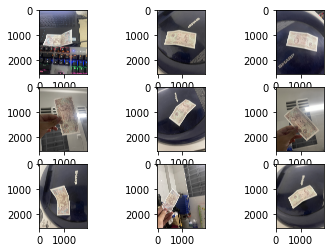

In [18]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
haik = '/content/drive/MyDrive/Colab Notebooks/phanloai_tien/data/2k/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = haik + 'hai' + str(i) + '.jpg'
  image = imread(filename)
  plt.imshow(image)
plt.show()

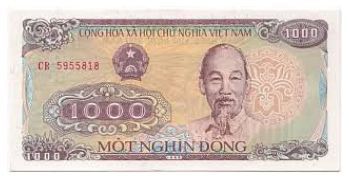

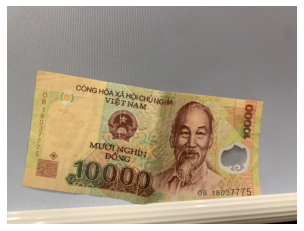

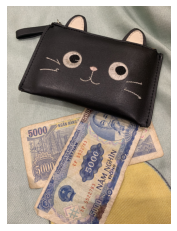

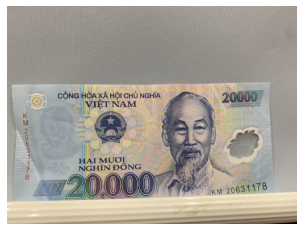

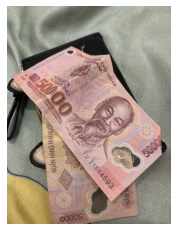

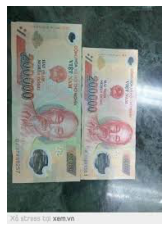

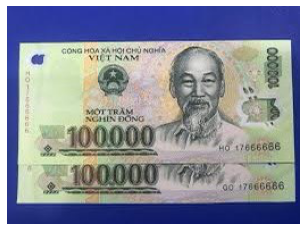

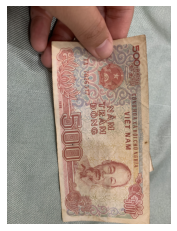

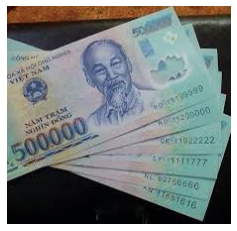

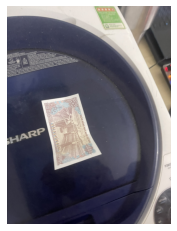

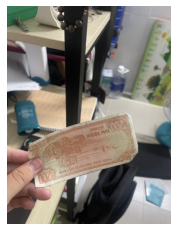

In [19]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 1

next_motk = [os.path.join(motk_dir, fname) 
                for fname in motk_files[pic_index-1:pic_index]]
next_muoik = [os.path.join(muoik_dir, fname) 
                for fname in muoik_files[pic_index-1:pic_index]]
next_namk = [os.path.join(namk_dir, fname) 
                for fname in namk_files[pic_index-1:pic_index]]
next_haik = [os.path.join(haik_dir, fname) 
                for fname in haik_files[pic_index-1:pic_index]]
next_haichuc = [os.path.join(haichuc_dir, fname) 
                for fname in haichuc_files[pic_index-1:pic_index]]
next_namchuc = [os.path.join(namchuc_dir, fname) 
                for fname in namchuc_files[pic_index-1:pic_index]]
next_haitram = [os.path.join(haitram_dir, fname) 
                for fname in haitram_files[pic_index-1:pic_index]] 
next_mottram = [os.path.join(mottram_dir, fname) 
                for fname in mottram_files[pic_index-1:pic_index]]
next_haitramdong = [os.path.join(haitramdong_dir, fname) 
                for fname in haitramdong_files[pic_index-1:pic_index]]
next_namtramdong = [os.path.join(namtramdong_dir, fname) 
                for fname in namtramdong_files[pic_index-1:pic_index]]
next_namtram = [os.path.join(namtram_dir, fname) 
                for fname in namtram_files[pic_index-1:pic_index]]

for i, img_path in enumerate(next_motk+next_muoik+next_namk+next_haichuc+next_namchuc+next_haitram+next_mottram+next_namtramdong+next_namtram+next_haik+next_haitramdong):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [107]:
training_datagen = ImageDataGenerator(
                                rotation_range=15,
                                rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.5,
                                horizontal_flip=True,
                                width_shift_range=0.2,
                                height_shift_range=0.2)

train_generator = training_datagen.flow_from_directory(
	directory="/content/drive/MyDrive/Colab Notebooks/phanloai_tien/data/",
	target_size=(100,100),
	class_mode='categorical',
  subset='training',
  shuffle=True
  # batch_size=336
)

VALIDATION_DIR ="/content/drive/MyDrive/Colab Notebooks/phanloai_tien/test/"
# validation_datagen = ImageDataGenerator(rescale = 1./255)
validation_generator = training_datagen.flow_from_directory(
	directory="/content/drive/MyDrive/Colab Notebooks/phanloai_tien/test/",
	target_size=(100,100),
	class_mode='categorical',
  subset='validation',
  shuffle=True
  # batch_size=336
)

Found 549 images belonging to 11 classes.
Found 0 images belonging to 11 classes.


In [117]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator



model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 550 neuron hidden layer
    tf.keras.layers.Dense(549, activation='relu'),
    tf.keras.layers.Dense(11, activation='softmax')
])

model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 98, 98, 64)        1792      
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 49, 49, 64)       0         
 g2D)                                                            
                                                                 
 dropout_40 (Dropout)        (None, 49, 49, 64)        0         
                                                                 
 conv2d_33 (Conv2D)          (None, 47, 47, 64)        36928     
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 23, 23, 64)       0         
 g2D)                                                            
                                                                 
 dropout_41 (Dropout)        (None, 23, 23, 64)       

In [26]:
history = model.fit(train_generator,batch_size=10, epochs=50, validation_data = validation_generator, verbose = 0.5)


Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50


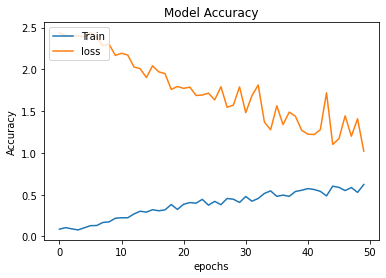

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
#plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend(['Train','loss'],loc='upper left')
plt.show()

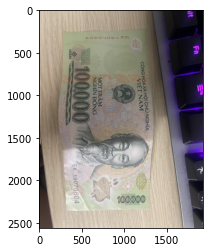

đây là một trăm ngàn đồng


In [97]:
filename = '/content/drive/MyDrive/Colab Notebooks/phanloai_tien/test/100k/1.jpg'  
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()

img = load_img(filename,target_size = (100,100))
img = img_to_array(img)
img =  img.reshape(1,100,100,3)
img = img.astype('float32')
img = img/255
kq = np.argmax(model.predict(img),axis= -1)
if kq==0:
  print('Đây là một ngàn đồng')
elif kq ==1:
  print('đây là hai ngàn đồng')
elif kq ==2:
  print('đây là năm ngàn đồng')
elif kq ==3:
  print('đây là mười ngàn đồng')
elif kq ==4:
  print('đây là hai mươi ngàn đồng')
elif kq ==5:
  print('đây là năm mươi ngàn đồng')
elif kq ==6:
  print('đây là một trăm ngàn đồng')
elif kq ==7:
  print('đây là hai trăm đồng')
elif kq ==8:
  print('đây là hai trăm ngàn đồng')
elif kq ==9:
  print('đây là năm trăm đồng')
elif kq==10:
  print('đây là năm trăm ngàn đồng')

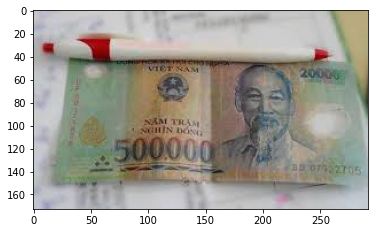

đây là năm trăm ngàn đồng


In [122]:
filename = '/content/drive/MyDrive/Colab Notebooks/phanloai_tien/test/500k/6.jpg'  
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()

img = load_img(filename,target_size = (100,100))
img = img_to_array(img)
img =  img.reshape(1,100,100,3)
img = img.astype('float32')
img = img/255
kq = np.argmax(model.predict(img),axis= -1)
if kq==0:
  print('Đây là một ngàn đồng')
elif kq ==1:
  print('đây là hai ngàn đồng')
elif kq ==2:
  print('đây là năm trăm ngàn đồng')
elif kq ==3:
  print('đây là mười ngàn đồng')
elif kq ==4:
  print('đây là hai mươi ngàn đồng')
elif kq ==5:
  print('đây là năm mươi ngàn đồng')
elif kq ==6:
  print('đây là một trăm ngàn đồng')
elif kq ==7:
  print('đây là hai trăm đồng')
elif kq ==8:
  print('đây là hai trăm ngàn đồng')
elif kq ==9:
  print('đây là năm trăm đồng')
elif kq==10:
  print('đây là năm ngàn đồng')

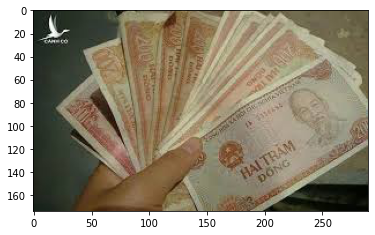

đây là hai trăm đồng


In [126]:
filename = '/content/drive/MyDrive/Colab Notebooks/phanloai_tien/test/200d/3.jpg'  
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()

img = load_img(filename,target_size = (100,100))
img = img_to_array(img)
img =  img.reshape(1,100,100,3)
img = img.astype('float32')
img = img/255
kq = np.argmax(model.predict(img),axis= -1)
if kq==0:
  print('Đây là một ngàn đồng')
elif kq ==1:
  print('đây là hai ngàn đồng')
elif kq ==2:
  print('đây là hai trăm đồng')
elif kq ==3:
  print('đây là mười ngàn đồng')
elif kq ==4:
  print('đây là hai mươi ngàn đồng')
elif kq ==5:
  print('đây là năm mươi ngàn đồng')
elif kq ==6:
  print('đây là một trăm ngàn đồng')
elif kq ==7:
  print('đây là năm ngàn đồng')
elif kq ==8:
  print('đây là hai trăm ngàn đồng')
elif kq ==9:
  print('đây là năm trăm đồng')
elif kq==10:
  print('đây là năm trăm ngàn đồng')